In [1]:
using Clustering, PyPlot
using TextAnalysis
using JLD
using Statistics
using XLSX
using CSV
using DataFrames
using Dates
using LinearAlgebra
using StatsBase
using MultivariateStats
using Random

In [2]:
include("../src/utill.jl")

In [3]:
new_df = XLSX.readxlsx("../data/Data-Spring/covid-en.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

en_1 = DataFrame(new_df["A2:$stop_ind"],  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang])

new_df = XLSX.readxlsx("../data/Data-Winter/covid-en.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

en_2 = DataFrame(new_df["A2:$stop_ind"],  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang]);

In [4]:
new_df = XLSX.readxlsx("../data/Data-Spring/covid-de.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

de_1 = DataFrame(new_df["A2:$stop_ind"],  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang])

msk_tmp = typeof.(de_1.created_at) .!== Date
de_1 = de_1[msk_tmp,:]


new_df = XLSX.readxlsx("../data/Data-Winter/covid-de.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

de_2 = DataFrame(new_df["A2:$stop_ind"],  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang]);

In [5]:
new_df = XLSX.readxlsx("../data/Data-Spring/covid-ru.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

ru_1 = DataFrame(new_df["A2:$stop_ind"],  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang])


msk_tmp = typeof.(ru_1.created_at) .!== Date
ru_1 = ru_1[msk_tmp,:]

new_df = XLSX.readxlsx("../data/Data-Winter/covid-ru.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

ru_2 = DataFrame(new_df["A2:$stop_ind"],  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang]);

In [6]:
new_df = XLSX.readxlsx("../data/Data-Spring/covid-ua.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

ua_1 = DataFrame(new_df["A2:$stop_ind"],  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang])

new_df = XLSX.readxlsx("../data/Data-Winter/covid-ua.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

ua_2 = DataFrame(new_df["A2:$stop_ind"],  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, 
        :lang]);

In [7]:
minuteofweek(dt) = (Dates.dayofweek.(dt)-1) .* 24.0 .* 60.0 .+ Dates.hour.(dt) .* 60.0 .+ Dates.minute.(dt) 

minuteofweek (generic function with 1 method)

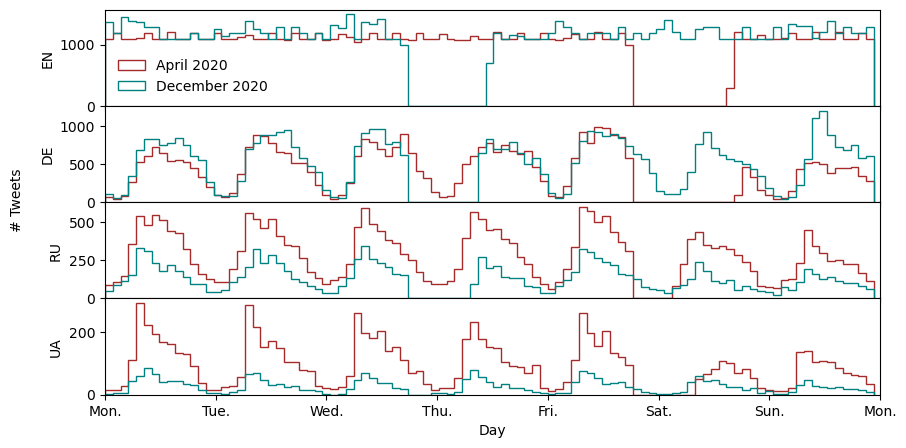

PyObject Text(63.097222222222214, 0.5, 'UA')

In [24]:
en_min_1 = minuteofweek.(en_1.created_at)
en_min_2 = minuteofweek.(en_2.created_at)

de_min_1 = minuteofweek.(de_1.created_at)
de_min_2 = minuteofweek.(de_2.created_at)

ru_min_1 = minuteofweek.(ru_1.created_at)
ru_min_2 = minuteofweek.(ru_2.created_at)

ua_min_1 = minuteofweek.(ua_1.created_at)
ua_min_2 = minuteofweek.(ua_2.created_at)

bins = range(0, stop = 10000, length=100)

fig, ax= plt.subplots(4,1, figsize=(10,5), sharex=true)
fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax[1].hist(en_min_1, histtype=:step, bins=bins, color="brown", fill=false, label="April 2020",)
ax[1].hist(en_min_2, histtype=:step, bins=bins, color="teal", label="December 2020")

ax[2].hist(de_min_1, histtype=:step, bins=bins, color="brown")
ax[2].hist(de_min_2, histtype=:step, bins=bins, color="teal")

ax[3].hist(ru_min_1, histtype=:step, bins=bins, color="brown")
ax[3].hist(ru_min_2, histtype=:step, bins=bins, color="teal")

ax[4].hist(ua_min_1, histtype=:step, bins=bins, color="brown", label="April 2020")
ax[4].hist(ua_min_2, histtype=:step, bins=bins, color="teal", label="December 2020")

ax[1].legend(loc="lower left", frameon=false)
ax[1].set_xlim(0, 10080)

ax[1].set_xticks(range(0, stop=10080, length=8))
dnames = ["Mon.", "Tue.", "Wed.", "Thu.", "Fri.", "Sat.", "Sun.", "Mon."]
ax[1].set_xticklabels(dnames, ha="center")

fig.text(0.03, 0.5, "# Tweets", va="center", rotation="vertical")


ax[4].set_xlabel("Day")
ax[1].set_ylabel("EN")
ax[2].set_ylabel("DE")
ax[3].set_ylabel("RU")
ax[4].set_ylabel("UA")

# fig.savefig("../plots/activity.pdf", bbox_inches = "tight",) # dpi=500

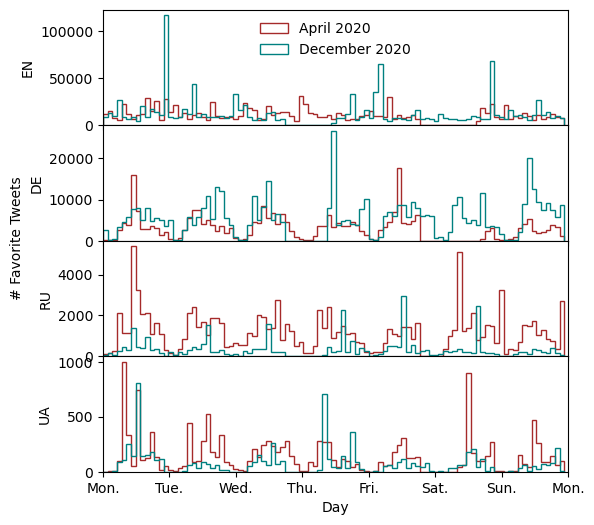

PyObject Text(52.222222222222214, 0.5, 'UA')

In [9]:
en_min_1 = minuteofweek.(en_1.created_at)
en_min_2 = minuteofweek.(en_2.created_at)

de_min_1 = minuteofweek.(de_1.created_at)
de_min_2 = minuteofweek.(de_2.created_at)

ru_min_1 = minuteofweek.(ru_1.created_at)
ru_min_2 = minuteofweek.(ru_2.created_at)

ua_min_1 = minuteofweek.(ua_1.created_at)
ua_min_2 = minuteofweek.(ua_2.created_at)

bins = range(0, stop = 10000, length=100)

fig, ax= plt.subplots(4,1, figsize=(6,6), sharex=true)
fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax[1].hist(en_min_1, weights=en_1.favorite_count, histtype=:step, bins=bins, color="brown", label="April 2020")
ax[1].hist(en_min_2, weights=en_2.favorite_count, histtype=:step, bins=bins, color="teal", label="December 2020")

ax[2].hist(de_min_1, weights=de_1.favorite_count, histtype=:step, bins=bins, color="brown")
ax[2].hist(de_min_2, weights=de_2.favorite_count, histtype=:step, bins=bins, color="teal")

ax[3].hist(ru_min_1, weights=ru_1.favorite_count, histtype=:step, bins=bins, color="brown")
ax[3].hist(ru_min_2, weights=ru_2.favorite_count, histtype=:step, bins=bins, color="teal")

ax[4].hist(ua_min_1, weights=ua_1.favorite_count,  histtype=:step, bins=bins, color="brown", label="April 2020")
ax[4].hist(ua_min_2, weights=ua_2.favorite_count,  histtype=:step, bins=bins, color="teal", label="December 2020")

ax[1].legend(loc="upper center", frameon=false)
ax[1].set_xlim(0, 10080)

ax[1].set_xticks(range(0, stop=10080, length=8))
dnames = ["Mon.", "Tue.", "Wed.", "Thu.", "Fri.", "Sat.", "Sun.", "Mon."]
ax[1].set_xticklabels(dnames, ha="center")

fig.text(-0.03, 0.5, "# Favorite Tweets", va="center", rotation="vertical")

ax[4].set_xlabel("Day")
ax[1].set_ylabel("EN")
ax[2].set_ylabel("DE")
ax[3].set_ylabel("RU")
ax[4].set_ylabel("UA")


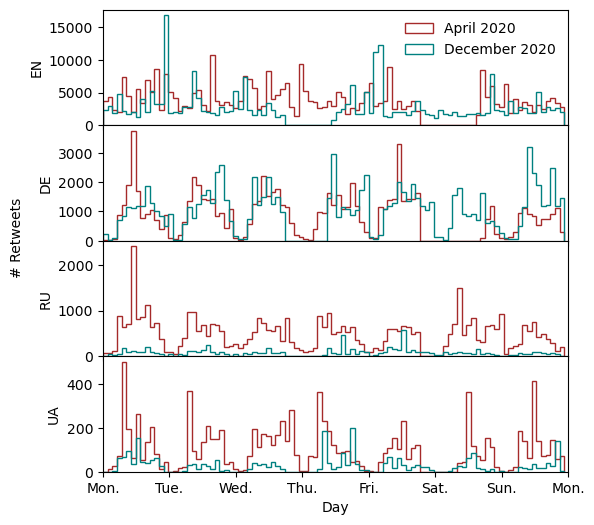

PyObject Text(61.097222222222214, 0.5, 'UA')

In [10]:
en_min_1 = minuteofweek.(en_1.created_at)
en_min_2 = minuteofweek.(en_2.created_at)

de_min_1 = minuteofweek.(de_1.created_at)
de_min_2 = minuteofweek.(de_2.created_at)

ru_min_1 = minuteofweek.(ru_1.created_at)
ru_min_2 = minuteofweek.(ru_2.created_at)

ua_min_1 = minuteofweek.(ua_1.created_at)
ua_min_2 = minuteofweek.(ua_2.created_at)

bins = range(0, stop = 10000, length=100)

fig, ax= plt.subplots(4,1, figsize=(6,6), sharex=true)
fig.subplots_adjust(hspace=0.0, wspace=0.0)

ax[1].hist(en_min_1, weights=en_1.retweet_count, histtype=:step, bins=bins, color="brown", label="April 2020")
ax[1].hist(en_min_2, weights=en_2.retweet_count, histtype=:step, bins=bins, color="teal", label="December 2020")

ax[2].hist(de_min_1, weights=de_1.retweet_count, histtype=:step, bins=bins, color="brown")
ax[2].hist(de_min_2, weights=de_2.retweet_count, histtype=:step, bins=bins, color="teal")

ax[3].hist(ru_min_1, weights=ru_1.retweet_count, histtype=:step, bins=bins, color="brown")
ax[3].hist(ru_min_2, weights=ru_2.retweet_count, histtype=:step, bins=bins, color="teal")

ax[4].hist(ua_min_1, weights=ua_1.retweet_count,  histtype=:step, bins=bins, color="brown", label="April 2020")
ax[4].hist(ua_min_2, weights=ua_2.retweet_count,  histtype=:step, bins=bins, color="teal", label="December 2020")

ax[1].legend(loc="upper right", frameon=false)
ax[1].set_xlim(0, 10080)

ax[1].set_xticks(range(0, stop=10080, length=8))
dnames = ["Mon.", "Tue.", "Wed.", "Thu.", "Fri.", "Sat.", "Sun.", "Mon."]
ax[1].set_xticklabels(dnames, ha="center")

fig.text(-0.03, 0.5, "# Retweets", va="center", rotation="vertical")

ax[4].set_xlabel("Day")
ax[1].set_ylabel("EN")
ax[2].set_ylabel("DE")
ax[3].set_ylabel("RU")
ax[4].set_ylabel("UA")
